In [58]:
print('float = %5.3f' % 1.234499)

float = 1.234


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import uncertainties as u
from uncertainties import unumpy

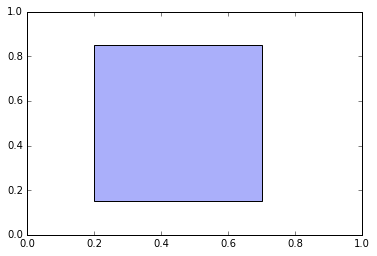

In [60]:
# plot a rectangle: args are: [(bottom left corner cords), width, height, args]
rectangle = plt.Rectangle((.2, .15), .5, .7, facecolor = "#aaaffa") # not sure what the
# matplotlib color naming sceme is, but aaaffa is nice!

plt.gca().add_patch(rectangle) # add the recatngle to a new figure
plt.show() # show the plot

In [61]:
# ok great we can make a rectangle....
# time to talk about fieldspace
# first here are the calibration values for the coils:
xFieldGain = u.ufloat(42.24e-6, 0.08e-6) # T/A
yFieldGain = u.ufloat(45.99e-6, 0.09e-6) # T/A
zFieldGain = u.ufloat(132.16e-6, 0.08e-6) # T/A

# and here are the field values for each of the 4 laser crossings (one for each mirror)
crossings = np.genfromtxt('crossingData1.csv', delimiter=',', skip_header=True, usecols=(1,2,3,4))
print(crossings)
#each row represents a coil's data (x,y,z)
# each column represents a point in 3d field space at which we found optical 0
# turn crossings from miliamps to amps
crossings *= 1e-3
# turn crossings from amps to field with the calibration data:
crossings[0] *= xFieldGain.n # first row of crossings is the x data multiply by the field gain to get tesla
crossings[1] *= yFieldGain.n # do the same for the y and z values
crossings[2] *= zFieldGain.n

[[-380.6 -990.     0.  -419.1]
 [-990.  -410.6 -380.1    0. ]
 [ 293.   354.    68.     0. ]]


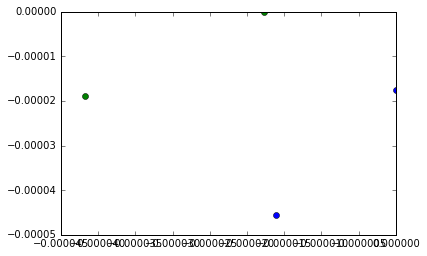

In [62]:
# plot the crossings in current space: (for now just use the x and y)
pair_one = crossings[0:2,::2] # also skip every other one
pair_two = crossings[0:2,1::2] # start one in then skip every other
#print(pair_one, '\n \n', pair_two)
plt.plot(pair_one[0],pair_one[1], 'o')
plt.plot(pair_two[0],pair_two[1], 'o')